<a href="https://colab.research.google.com/github/araujosantos-yasmin/atividades_curso_/blob/main/emprestimo_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste do Modelo:
Cliente [   35 45000     1     0     1]: Empréstimo Concedido: Não (Esperado: Não)
Cliente [   28 90000     1     1     1]: Empréstimo Concedido: Sim (Esperado: Sim)

Árvore de Decisão:


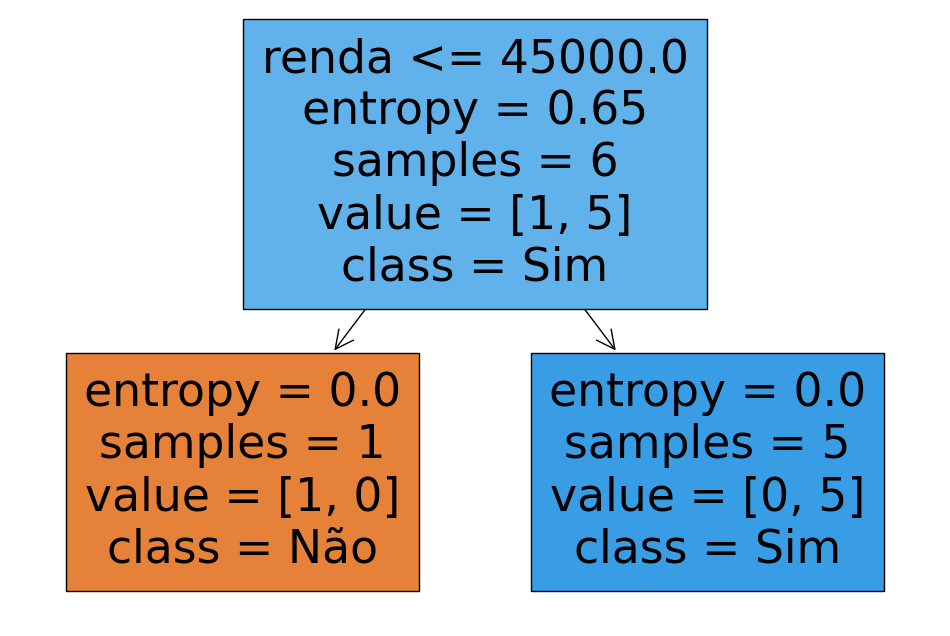

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo: [idade, renda, histórico_credito, emprego, propriedade, emprestimo_concedido]
dados = np.array([
    [25, 60000, 0, 1, 0, 1],  # [25, 60000, 'Bom', 'Empregado', 'Alugada', 'Sim']
    [35, 45000, 1, 0, 1, 0],  # [35, 45000, 'Ruim', 'Desempregado', 'Própria', 'Não']
    [45, 80000, 2, 1, 1, 1],  # [45, 80000, 'Muito Bom', 'Empregado', 'Própria', 'Sim']
    [30, 70000, 0, 1, 0, 1],  # [30, 70000, 'Bom', 'Empregado', 'Alugada', 'Sim']
    [22, 30000, 0, 0, 1, 0],  # [22, 30000, 'Bom', 'Desempregado', 'Própria', 'Não']
    [28, 90000, 1, 1, 1, 1],  # [28, 90000, 'Ruim', 'Empregado', 'Própria', 'Sim']
    [33, 120000, 2, 1, 0, 1],  # [33, 120000, 'Muito Bom', 'Empregado', 'Alugada', 'Sim']
    [40, 95000, 0, 0, 1, 1]   # [40, 95000, 'Bom', 'Desempregado', 'Própria', 'Sim']
])

# Definindo os rótulos para os dados
X = dados[:, :-1]  # Características
y = dados[:, -1]   # Rótulos

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o classificador da árvore de decisão
classificador_arvore = DecisionTreeClassifier(criterion="entropy", random_state=42)
classificador_arvore = classificador_arvore.fit(X_train, y_train)

# Função para classificar os dados
def classificar_emprestimo(dados_cliente, classificador):
    predicao = classificador.predict([dados_cliente])
    return "Sim" if predicao == 1 else "Não"

# Testando o modelo
def teste_do_modelo(X_test, y_test, classificador):
    for i in range(len(X_test)):
        resultado = classificar_emprestimo(X_test[i], classificador)
        print(f"Cliente {X_test[i]}: Empréstimo Concedido: {resultado} (Esperado: {'Sim' if y_test[i] == 1 else 'Não'})")

# Plotando a árvore de decisão
def plotar_arvore(arvore):
    plt.figure(figsize=(12, 8))
    plot_tree(arvore, filled=True, feature_names=["idade", "renda", "histórico_credito", "emprego", "propriedade"], class_names=["Não", "Sim"])
    plt.show()

# Teste do Modelo
print("Teste do Modelo:")
teste_do_modelo(X_test, y_test, classificador_arvore)

# Plotando a Árvore de Decisão
print("\nÁrvore de Decisão:")
plotar_arvore(classificador_arvore)
